In [1]:
import numpy as np
from math import cos,sin 
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

In [2]:
z_init = np.array([[5.0],[0.0]])

In [3]:
alpha1 = 0.1
alpha2 = 0.1
A_before = np.array([[cos(alpha1),-sin(alpha1)],
    [sin(alpha1),cos(alpha1)]])
b_before = np.array([[0.0],[0.0]])
A_after = 0.99*np.array([[cos(alpha2),-sin(alpha2)],
    [sin(alpha2),cos(alpha2)]])
b_after = np.array([[0.0],[0.0]])
B= np.array([[0.7,0.3],[0.8,0.2],[0.2,0.8]])

In [4]:
def transition(z,A,b,eps):
    return A @ (z - b) + b + np.random.randn(2,1) * eps

In [5]:
def emmition(B,z):
    return B @ z + np.random.randn(3,1)

In [6]:
T=1000
change_point = 400
eps = 0.05
_z_seq=[z_init]
_x_seq=[]

for t in range(T):
    _x_seq.append(emmition(B,_z_seq[-1]))
    if t < change_point:
        _z_seq.append(transition(_z_seq[-1],A_before,b_before,eps))
    else:
        _z_seq.append(transition(_z_seq[-1],A_after,b_after,eps))

z_seq = np.array(_z_seq)
x_seq = np.array(_x_seq)
np.save("z_seq.npy",z_seq)
np.save("x_seq.npy",x_seq)

In [7]:
z_seq_reshape =z_seq.reshape(T+1,2).T
x_seq_reshape =x_seq.reshape(T,3).T

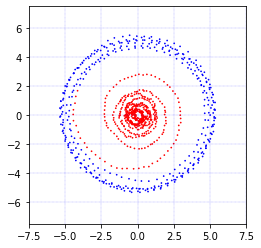

In [8]:
colors = ["blue" if t< change_point else "red" for t in range(T+1)]
fig = plt.figure()
ax = plt.axes()
ax.grid(color='b', linestyle=':', linewidth=0.3)
cir1 = patches.Circle(xy=(0.0, 0.0), radius=1.0, fill = False, )
cir2 = patches.Circle(xy=(-3.0, 0.0), radius=2.0, fill = False)
ax.scatter(z_seq_reshape[0],z_seq_reshape[1],color=colors,s=0.5)
ax.set_xlim(-7.5,7.5)
ax.set_ylim(-7.5,7.5)
ax.set_aspect("equal")
plt.show()

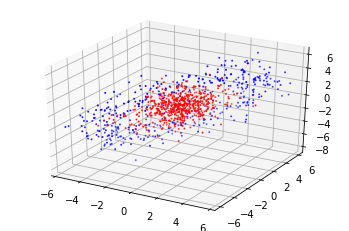

In [9]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_seq_reshape[0],
    x_seq_reshape[1],
    x_seq_reshape[2],color=colors[:-1],s=1.0)
plt.show()